In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
import math
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [51]:
data = pd.read_csv('Zillow_Final_Dataset.csv', low_memory=False)

In [52]:
data.shape

(70260, 21)

In [53]:
data.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,logerror,yeardifference,propertyzoningdesc_labels
0,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,...,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,0.0383,33.0,627
1,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,...,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,0.0030,55.0,638
2,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,...,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,-0.0020,56.0,638
3,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,...,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,0.0129,52.0,632
4,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,...,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,0.0630,17.0,769
5,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,...,60.371313,12447.0,3101.0,96355.0,0.0,1.0,4560.02,-0.1244,61.0,609
6,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,...,60.371341,12447.0,3101.0,96341.0,0.0,1.0,4998.86,0.0545,51.0,638
7,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,...,60.371331,12447.0,3101.0,96364.0,0.0,1.0,5784.98,0.0070,62.0,609
8,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,...,60.371325,12447.0,3101.0,96364.0,0.0,1.0,3441.90,0.0611,64.0,609
9,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,...,60.371393,12447.0,3101.0,96379.0,0.0,1.0,3833.83,-0.0471,36.0,625


In [ ]:
# Splitting data into Train and Test Set

In [54]:
X = data.drop('logerror', axis=1)
y = data['logerror']

In [55]:
new_data = data.copy()

In [56]:
X.shape

(70260, 20)

In [57]:
y.shape

(70260,)

In [58]:
X.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,yeardifference,propertyzoningdesc_labels
0,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,266.0,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,33.0,627
1,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,261.0,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,55.0,638
2,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,261.0,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,56.0,638
3,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,261.0,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,52.0,632
4,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,269.0,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,17.0,769
5,10760933,2.0,4.0,7.0,1212.0,6037.0,7.0,34.220631,-118.521001,7379.0,261.0,60.371313,12447.0,3101.0,96355.0,0.0,1.0,4560.02,61.0,609
6,10772282,3.0,4.0,4.0,2597.0,6037.0,2.0,34.209413,-118.578052,10537.0,261.0,60.371341,12447.0,3101.0,96341.0,0.0,1.0,4998.86,51.0,638
7,10783331,2.0,3.0,7.0,1742.0,6037.0,7.0,34.185891,-118.550426,7076.0,261.0,60.371331,12447.0,3101.0,96364.0,0.0,1.0,5784.98,62.0,609
8,10784006,1.0,2.0,7.0,950.0,6037.0,7.0,34.192384,-118.549670,6242.0,261.0,60.371325,12447.0,3101.0,96364.0,0.0,1.0,3441.90,64.0,609
9,10799070,2.0,2.0,4.0,1001.0,6037.0,2.0,34.178100,-118.535000,87177.0,266.0,60.371393,12447.0,3101.0,96379.0,0.0,1.0,3833.83,36.0,625


In [59]:
y.head(10)

0    0.0383
1    0.0030
2   -0.0020
3    0.0129
4    0.0630
5   -0.1244
6    0.0545
7    0.0070
8    0.0611
9   -0.0471
Name: logerror, dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [61]:
X_train.shape, X_test.shape

((56208, 20), (14052, 20))

In [62]:
y_train.shape, y_test.shape

((56208,), (14052,))

In [ ]:
# Feature Scaling

In [63]:
train_variables = []
for var in X_train.columns:
    if var not in ['parcelid', 'logerror']:
        train_variables.append(var)
        
len(train_variables)

19

In [64]:
scaler = StandardScaler()
scaler.fit(X_train[train_variables])

X_train[train_variables] = scaler.transform(X_train[train_variables])
X_test[train_variables] = scaler.transform(X_test[train_variables])

In [65]:
X_train.shape

(56208, 20)

In [66]:
X_train.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,yeardifference,propertyzoningdesc_labels
11733,11041069,-0.197352,0.061984,-1.455344,-0.223147,-0.672972,-0.528352,0.951100,-1.226572,-0.247220,-0.502529,-0.706626,-0.815020,0.672972,-0.413986,-0.440480,-0.082261,-1.159070,0.300944,-0.401762
33579,11879130,-0.197352,-0.954052,-1.455344,-0.961886,-0.672972,-0.528352,0.450290,-0.243563,1.256514,1.330899,-0.699972,-0.815020,0.672972,-1.272406,-0.440480,-0.082261,-0.400560,-0.912872,-0.432594
68974,12229225,-0.197352,1.078019,0.628394,0.278894,-0.672972,1.915573,-0.165314,-0.452496,-0.305814,-0.502529,-0.694077,-0.815020,0.672972,-1.371645,-0.440480,-0.082261,-0.474095,2.598525,-0.470542
59980,14628114,0.423779,0.061984,0.628394,-0.449292,1.485946,-0.528352,-1.241203,1.897581,-0.311565,1.330899,1.483038,-0.654202,-1.485946,1.134146,-0.440480,-0.082261,0.322571,-0.826171,-0.470542
1666,14093700,1.044910,1.078019,0.628394,-0.420647,1.485946,-0.528352,-0.730531,0.483726,-0.173901,-0.502529,1.488638,-0.173974,-1.485946,1.270600,2.344460,-0.082261,-1.219993,0.561048,-0.470542
63534,14733748,0.423779,0.061984,0.628394,-0.616639,1.485946,-0.528352,-1.480747,1.752018,-0.311565,1.330899,1.483038,-0.654202,-1.485946,1.134146,-0.440480,-0.082261,0.210161,-1.346378,-0.470542
1169,12080932,-0.197352,0.061984,0.628394,1.086984,-0.672972,1.915573,0.579060,-0.330687,-0.237875,-0.502529,-0.700242,-0.815020,0.672972,-1.274887,-0.440480,-0.082261,0.509681,2.511824,-0.470542
2778,10785210,-1.439614,0.061984,0.628394,-0.783986,-0.672972,1.915573,0.779267,-1.571452,-0.310406,-0.502529,-0.705038,-0.815020,0.672972,-0.426391,-0.440480,-0.082261,-0.424859,0.734450,-0.470542
21808,14017467,-0.197352,0.061984,0.628394,0.025612,1.485946,1.426788,-0.486496,0.407396,-0.311565,-0.502529,1.490866,-0.910206,-1.485946,-0.882892,1.548763,-0.082261,0.085812,0.387646,-0.470542
8257,11240447,1.044910,1.078019,-1.455344,1.047786,-0.672972,-0.528352,2.075074,-0.091749,0.616863,-0.502529,-0.627382,0.622869,0.672972,1.967755,-0.440480,-0.082261,-0.388135,-0.436015,0.340587


In [ ]:
# Dropping parcelid

In [67]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='parcelid', axis=1, inplace=True)
X_test.drop(columns='parcelid', axis=1, inplace=True)

In [68]:
X_train.shape, X_test.shape

((56208, 19), (14052, 19))

In [ ]:
# Linear Regression Model

In [69]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [70]:
linear_regression_prediction = linear_regression.predict(X_test)

In [71]:
linear_regression_prediction

array([-0.00565632, -0.0007824 ,  0.01668563, ...,  0.01559079,
        0.00250482,  0.00433461])

In [72]:
y_test

14808    0.3358
27489    0.2135
69881    0.0159
36967    0.0000
9803     0.0488
          ...  
62060   -0.0182
24167    0.1231
19312   -0.0050
46892    0.0060
21428    0.0816
Name: logerror, Length: 14052, dtype: float64

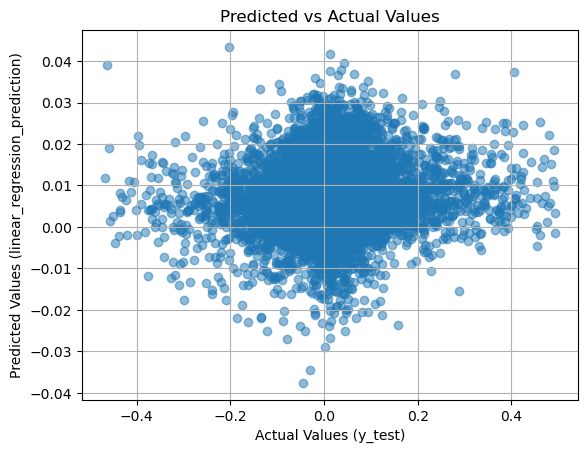

In [73]:
# Visualising predicted values and y_test

plt.scatter(y_test, linear_regression_prediction, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (linear_regression_prediction)')
plt.title('Predicted vs Actual Values')
plt.grid(True)

plt.show()

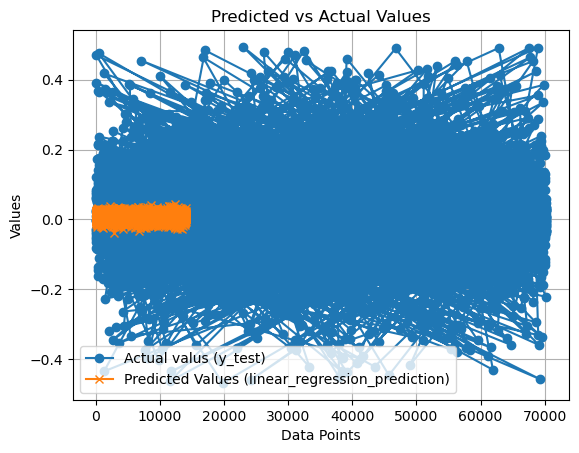

In [74]:
plt.plot(y_test, label='Actual valus (y_test)', marker='o')
plt.plot(linear_regression_prediction, label='Predicted Values (linear_regression_prediction)', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title("Predicted vs Actual Values")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Scatter Plot with a line of best fit

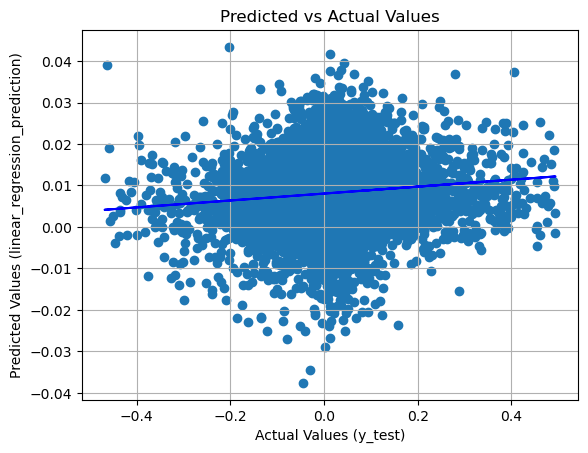

In [75]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(y_test, linear_regression_prediction)
line = slope * np.array(y_test) + intercept

plt.scatter(y_test, linear_regression_prediction)
plt.plot(y_test, line, color='blue')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (linear_regression_prediction)')
plt.title('Predicted vs Actual Values')
plt.grid(True)

plt.show()

In [ ]:
# Mean Absolute Error

In [76]:
print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, linear_regression_prediction)))

Mean Absolute Error : 0.052683398591761826


In [ ]:
# Mean Squared Error

In [77]:
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, linear_regression_prediction)))

Mean Squared Error : 0.0071510871956413785


In [ ]:
# Root Mean Squared Error

In [78]:
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, linear_regression_prediction))))

Root Mean Squared Error : 0.08456410110467312
